In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = pd.read_csv('IPL_Players_Data(2008-2022).csv',index_col=0)
x['Average'].replace('-',np.NaN,inplace=True)
x['Average'] = x['Average'].astype(dtype='float64')
x['Higest_score'].replace('[*]','',regex=True,inplace=True)
x['Higest_score'] = x['Higest_score'].astype(dtype='int64')

In [165]:
x.head(10)

,Players,Year,Matches,Runs,Average,Higest_score,Strike Rate,NO,Fifty,Four,Six
index,,,,,,,,,,,
0,Jos Buttler,2022,17,863,57.53,116,149.05,2,4,83,45
1,K L Rahul,2022,15,616,51.33,103,135.38,3,4,45,30
2,Quinton De Kock,2022,15,508,36.29,140,148.97,1,3,47,23
3,Hardik Pandya,2022,15,487,44.27,87,131.26,4,4,49,12
4,Shubman Gill,2022,16,483,34.50,96,132.32,2,4,51,11
5,David Miller,2022,16,481,68.71,94,142.72,9,2,32,23
6,Faf Du Plessis,2022,16,468,31.20,96,127.52,1,3,49,13
7,Shikhar Dhawan,2022,14,460,38.33,88,122.66,2,3,47,12
8,Sanju Samson,2022,17,458,28.63,55,146.79,1,2,43,26


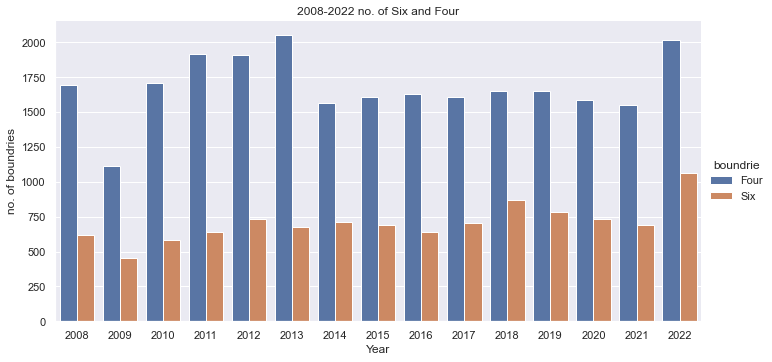

In [170]:
boundries= x[['Year','Four','Six']].groupby('Year').sum().reset_index()
c = pd.melt(boundries, id_vars="Year",var_name="boundrie", value_name="no. of boundries")
sns.set_theme()
sns.catplot(x='Year',y='no. of boundries',hue='boundrie',data=c,kind='bar',height=5,aspect=2).set(title='2008-2022 no. of Six and Four')

C:\Users\musaa\AppData\Local\Temp\ipykernel_17700\3766458638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Best_score_player['Player(Year)'] = Best_score_player['Players']+" ("+Best_score_player['Year'].astype('str')+")"


[Text(0.5, 1.0, '2008-2022 Best score player')]

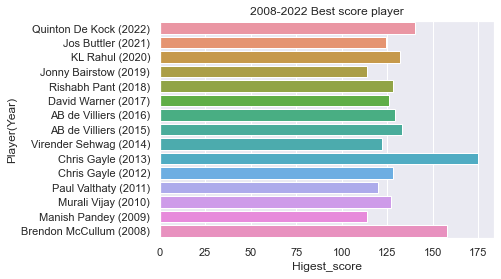

In [171]:
Best_score_player = x[x.groupby('Year')['Higest_score'].transform(max)==x['Higest_score']]
Best_score_player['Player(Year)'] = Best_score_player['Players']+" ("+Best_score_player['Year'].astype('str')+")"
sns.set_theme()
sns.barplot(y='Player(Year)',x='Higest_score',data=Best_score_player).set(title="2008-2022 Best score player")

[Text(0.5, 1.0, '2008-2022 highest no. of fifty')]

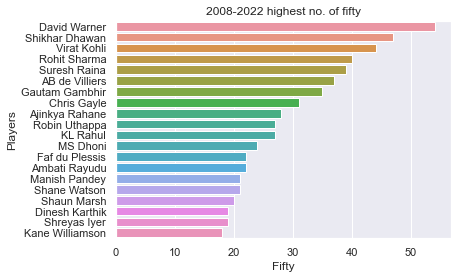

In [172]:
highest_no_of_fifty= x[['Players','Fifty']].groupby('Players').sum().sort_values('Fifty',ascending=False).head(20)
sns.set_theme()
sns.barplot(y=highest_no_of_fifty.index,x='Fifty',data=highest_no_of_fifty).set(title="2008-2022 highest no. of fifty")

[Text(0.5, 1.0, '2008-2022 Most Six Players')]

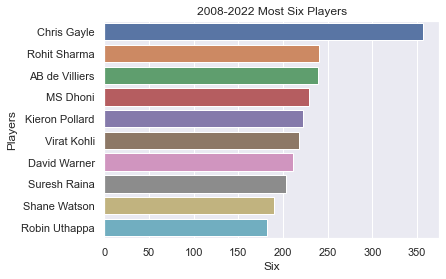

In [173]:
highest_no_of_six = x[['Players','Six']].groupby('Players').sum().sort_values('Six',ascending=False).head(10)
sns.set_theme()
sns.barplot(x='Six',y=highest_no_of_six.index,data=highest_no_of_six).set(title='2008-2022 Most Six Players')

[Text(0.5, 1.0, '2008-2022 Most Four Players')]

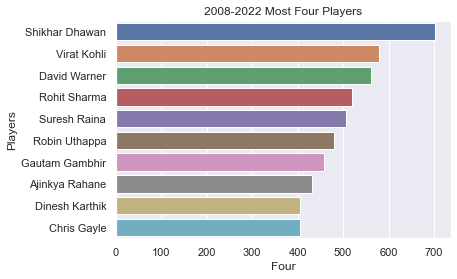

In [174]:
highest_no_of_four = x[['Players','Four']].groupby('Players').sum().sort_values('Four',ascending=False).head(10)
sns.set_theme()
sns.barplot(y=highest_no_of_four.index,x='Four',data=highest_no_of_four).set(title='2008-2022 Most Four Players')

C:\Users\musaa\AppData\Local\Temp\ipykernel_17700\1720550618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_of_the_series['Player(Year)'] = "("+mos['Year'].astype('str')+")"+" "+ mos['Players']


[Text(0.5, 1.0, '2008-2022 Man of the Series')]

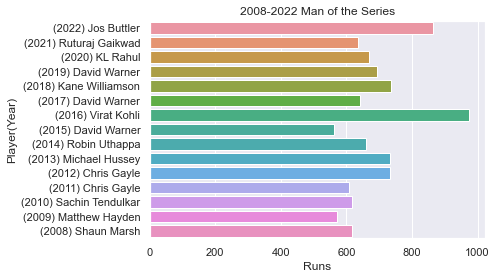

In [176]:
mos = x[x.groupby(['Year'])['Runs'].transform(max)==x['Runs']]
man_of_the_series =mos[['Year','Players','Runs']]
man_of_the_series['Player(Year)'] = "("+mos['Year'].astype('str')+")"+" "+ mos['Players']
man_of_the_series.set_index('Year')
sns.set_theme()
sns.barplot(y='Player(Year)',x='Runs',data=man_of_the_series).set(title='2008-2022 Man of the Series')

[Text(0.5, 1.0, '2008-2022 most runs players')]

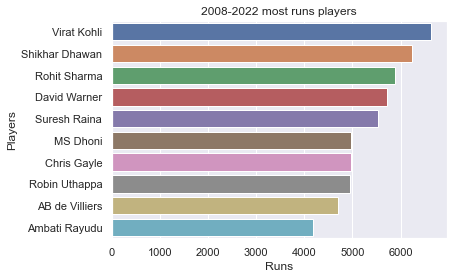

In [177]:
highest_Runs = x[['Players','Runs']].groupby('Players').sum().sort_values('Runs',ascending=False).head(10)
sns.set_theme()
sns.barplot(y=highest_Runs.index,x='Runs',data=highest_Runs).set(title='2008-2022 most runs players')